In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np

# Load the data

In [2]:
df = pd.read_csv('mod_data_training_ys_4.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1460 non-null   object 
 1   river_level_max           1460 non-null   float64
 2   rainfall                  1460 non-null   float64
 3   sunshine_duration         1460 non-null   float64
 4   temperature_avg           1460 non-null   float64
 5   wind_speed_avg            1460 non-null   float64
 6   humidity_avg              1460 non-null   float64
 7   condition                 1460 non-null   float64
 8   river_level_max_tomorrow  1460 non-null   float64
dtypes: float64(8), object(1)
memory usage: 102.9+ KB


In [4]:
df.isna().sum()

date                        1
river_level_max             1
rainfall                    1
sunshine_duration           1
temperature_avg             1
wind_speed_avg              1
humidity_avg                1
condition                   1
river_level_max_tomorrow    1
dtype: int64

In [5]:
df.dropna(inplace=True)
#df

In [6]:
df.describe()

,river_level_max,rainfall,sunshine_duration,temperature_avg,wind_speed_avg,humidity_avg,condition,river_level_max_tomorrow
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,89.458442,5.334110,5.981918,28.751096,2.204795,75.821233,0.160959,89.397163
std,85.980059,15.295454,2.908333,0.895150,0.893111,5.651905,0.564651,86.011929
min,0.000000,0.000000,0.000000,24.900000,0.000000,58.000000,0.000000,0.000000
25%,71.084677,0.100000,3.900000,28.200000,2.000000,72.000000,0.000000,71.000000
50%,89.467711,0.600000,6.600000,28.800000,2.000000,76.000000,0.000000,89.467711
75%,92.000000,1.925000,8.300000,29.400000,3.000000,80.000000,0.000000,92.000000
max,1292.000000,155.500000,11.600000,31.400000,7.000000,94.000000,3.000000,1292.000000


In [7]:
target_column = 'river_level_max_tomorrow'
feature_columns = ['rainfall', 'sunshine_duration',
                   'temperature_avg', 'wind_speed_avg',	'humidity_avg']

# Normalisasi

In [8]:
df.loc[:, feature_columns] = ((df[feature_columns] - df[feature_columns].min())/ 
                              (df[feature_columns].max() - df[feature_columns].min()))

df[feature_columns].describe()

,rainfall,sunshine_duration,temperature_avg,wind_speed_avg,humidity_avg
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.034303,0.515683,0.592476,0.314971,0.495034
std,0.098363,0.250718,0.137715,0.127587,0.156997
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000643,0.336207,0.507692,0.285714,0.388889
50%,0.003859,0.568966,0.600000,0.285714,0.500000
75%,0.012379,0.715517,0.692308,0.428571,0.611111
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Train & test split

In [9]:
# Shuffle
df = df.sample(frac=1)

# Calculate test set size
test_set_size = int(len(df) * 0.01)

# Split the data
testing_df = df[:test_set_size]
training_df = df[test_set_size:]

print("Number of training data = ", len(training_df))
print("Number of testing data = ", len(testing_df))

Number of training data =  1446
Number of testing data =  14


In [10]:
train_features = np.asarray(training_df[feature_columns])
test_features = np.asarray(testing_df[feature_columns])

train_label = np.asarray(training_df[target_column])
test_label = np.asarray(testing_df[target_column])

# Simple DNN model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [12]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=["mae"])

# Training the model

In [13]:
batch_size = 20
history = model.fit(train_features, train_label, epochs=500, validation_split=0.1, batch_size=batch_size)

Epoch 1/500
66/66 [==============================] - 3s 19ms/step - loss: 85.9430 - mae: 86.3803 - val_loss: 92.0228 - val_mae: 92.4587
Epoch 2/500
66/66 [==============================] - 0s 5ms/step - loss: 90.9332 - mae: 91.3777 - val_loss: 92.0117 - val_mae: 92.4484
Epoch 3/500
66/66 [==============================] - 0s 6ms/step - loss: 90.2481 - mae: 90.6840 - val_loss: 92.0008 - val_mae: 92.4385
Epoch 4/500
66/66 [==============================] - 0s 5ms/step - loss: 89.7339 - mae: 90.1801 - val_loss: 91.9898 - val_mae: 92.4287
Epoch 5/500
66/66 [==============================] - 0s 6ms/step - loss: 89.8469 - mae: 90.2971 - val_loss: 91.9790 - val_mae: 92.4196
Epoch 6/500
66/66 [==============================] - 0s 6ms/step - loss: 86.3820 - mae: 86.8242 - val_loss: 91.9683 - val_mae: 92.4105
Epoch 7/500
66/66 [==============================] - 0s 6ms/step - loss: 86.1918 - mae: 86.6342 - val_loss: 91.9577 - val_mae: 92.4015
Epoch 8/500
66/66 [==============================] - 0

66/66 [==============================] - 0s 6ms/step - loss: 85.1326 - mae: 85.6326 - val_loss: 90.1450 - val_mae: 90.6450
Epoch 122/500
66/66 [==============================] - 0s 6ms/step - loss: 86.2277 - mae: 86.7277 - val_loss: 90.1024 - val_mae: 90.6024
Epoch 123/500
66/66 [==============================] - 0s 5ms/step - loss: 89.3197 - mae: 89.8197 - val_loss: 90.0588 - val_mae: 90.5588
Epoch 124/500
66/66 [==============================] - 0s 6ms/step - loss: 87.8884 - mae: 88.3884 - val_loss: 90.0131 - val_mae: 90.5131
Epoch 125/500
66/66 [==============================] - 0s 6ms/step - loss: 84.7183 - mae: 85.2183 - val_loss: 89.9660 - val_mae: 90.4660
Epoch 126/500
66/66 [==============================] - 0s 5ms/step - loss: 87.3043 - mae: 87.8043 - val_loss: 89.9191 - val_mae: 90.4191
Epoch 127/500
66/66 [==============================] - 0s 5ms/step - loss: 87.4382 - mae: 87.9382 - val_loss: 89.8697 - val_mae: 90.3697
Epoch 128/500
66/66 [==============================] - 

Epoch 181/500
66/66 [==============================] - 0s 5ms/step - loss: 60.6611 - mae: 61.1597 - val_loss: 62.4348 - val_mae: 62.9348
Epoch 182/500
66/66 [==============================] - 0s 5ms/step - loss: 56.5564 - mae: 57.0564 - val_loss: 58.8473 - val_mae: 59.3473
Epoch 183/500
66/66 [==============================] - 0s 6ms/step - loss: 55.6922 - mae: 56.1914 - val_loss: 54.7873 - val_mae: 55.2854
Epoch 184/500
66/66 [==============================] - 0s 6ms/step - loss: 49.9797 - mae: 50.4794 - val_loss: 50.7007 - val_mae: 51.2007
Epoch 185/500
66/66 [==============================] - 0s 6ms/step - loss: 45.7634 - mae: 46.2624 - val_loss: 46.9612 - val_mae: 47.4612
Epoch 186/500
66/66 [==============================] - 0s 6ms/step - loss: 46.0858 - mae: 46.5824 - val_loss: 43.9952 - val_mae: 44.4922
Epoch 187/500
66/66 [==============================] - 0s 6ms/step - loss: 41.3272 - mae: 41.8218 - val_loss: 42.7052 - val_mae: 43.1970
Epoch 188/500
66/66 [====================

Epoch 241/500
66/66 [==============================] - 0s 5ms/step - loss: 36.4845 - mae: 36.9732 - val_loss: 41.5909 - val_mae: 42.0672
Epoch 242/500
66/66 [==============================] - 0s 6ms/step - loss: 38.0942 - mae: 38.5840 - val_loss: 41.5670 - val_mae: 42.0449
Epoch 243/500
66/66 [==============================] - 0s 5ms/step - loss: 34.9271 - mae: 35.4152 - val_loss: 41.5492 - val_mae: 42.0306
Epoch 244/500
66/66 [==============================] - 0s 5ms/step - loss: 37.1329 - mae: 37.6215 - val_loss: 41.5392 - val_mae: 42.0179
Epoch 245/500
66/66 [==============================] - 0s 5ms/step - loss: 37.1499 - mae: 37.6379 - val_loss: 41.5244 - val_mae: 42.0042
Epoch 246/500
66/66 [==============================] - 0s 6ms/step - loss: 34.2468 - mae: 34.7325 - val_loss: 41.5132 - val_mae: 41.9935
Epoch 247/500
66/66 [==============================] - 0s 5ms/step - loss: 34.3731 - mae: 34.8604 - val_loss: 41.4931 - val_mae: 41.9742
Epoch 248/500
66/66 [====================

Epoch 301/500
66/66 [==============================] - 0s 6ms/step - loss: 35.8551 - mae: 36.3410 - val_loss: 40.8109 - val_mae: 41.2937
Epoch 302/500
66/66 [==============================] - 0s 5ms/step - loss: 34.7608 - mae: 35.2439 - val_loss: 40.7948 - val_mae: 41.2797
Epoch 303/500
66/66 [==============================] - 0s 5ms/step - loss: 34.5710 - mae: 35.0515 - val_loss: 40.7853 - val_mae: 41.2705
Epoch 304/500
66/66 [==============================] - 0s 5ms/step - loss: 35.1158 - mae: 35.5975 - val_loss: 40.7768 - val_mae: 41.2607
Epoch 305/500
66/66 [==============================] - 0s 5ms/step - loss: 32.9640 - mae: 33.4499 - val_loss: 40.7671 - val_mae: 41.2511
Epoch 306/500
66/66 [==============================] - 0s 5ms/step - loss: 35.3955 - mae: 35.8777 - val_loss: 40.7664 - val_mae: 41.2486
Epoch 307/500
66/66 [==============================] - 0s 5ms/step - loss: 39.9288 - mae: 40.4141 - val_loss: 40.7474 - val_mae: 41.2326
Epoch 308/500
66/66 [====================

Epoch 361/500
66/66 [==============================] - 0s 6ms/step - loss: 36.2366 - mae: 36.7200 - val_loss: 40.3727 - val_mae: 40.8525
Epoch 362/500
66/66 [==============================] - 0s 5ms/step - loss: 40.6589 - mae: 41.1423 - val_loss: 40.3714 - val_mae: 40.8461
Epoch 363/500
66/66 [==============================] - 0s 6ms/step - loss: 35.5599 - mae: 36.0379 - val_loss: 40.3635 - val_mae: 40.8416
Epoch 364/500
66/66 [==============================] - 0s 5ms/step - loss: 32.0861 - mae: 32.5673 - val_loss: 40.3602 - val_mae: 40.8441
Epoch 365/500
66/66 [==============================] - 0s 6ms/step - loss: 36.5747 - mae: 37.0555 - val_loss: 40.3549 - val_mae: 40.8349
Epoch 366/500
66/66 [==============================] - 0s 6ms/step - loss: 36.2839 - mae: 36.7667 - val_loss: 40.3512 - val_mae: 40.8340
Epoch 367/500
66/66 [==============================] - 0s 5ms/step - loss: 31.9243 - mae: 32.4007 - val_loss: 40.3497 - val_mae: 40.8229
Epoch 368/500
66/66 [====================

Epoch 421/500
66/66 [==============================] - 0s 6ms/step - loss: 34.1801 - mae: 34.6524 - val_loss: 40.1748 - val_mae: 40.6614
Epoch 422/500
66/66 [==============================] - 0s 6ms/step - loss: 36.5730 - mae: 37.0533 - val_loss: 40.1711 - val_mae: 40.6587
Epoch 423/500
66/66 [==============================] - 0s 6ms/step - loss: 35.6793 - mae: 36.1577 - val_loss: 40.1684 - val_mae: 40.6564
Epoch 424/500
66/66 [==============================] - 0s 6ms/step - loss: 34.1873 - mae: 34.6667 - val_loss: 40.1668 - val_mae: 40.6544
Epoch 425/500
66/66 [==============================] - 0s 5ms/step - loss: 33.3746 - mae: 33.8501 - val_loss: 40.1629 - val_mae: 40.6513
Epoch 426/500
66/66 [==============================] - 0s 5ms/step - loss: 34.5228 - mae: 34.9993 - val_loss: 40.1607 - val_mae: 40.6490
Epoch 427/500
66/66 [==============================] - 0s 5ms/step - loss: 39.2653 - mae: 39.7464 - val_loss: 40.1587 - val_mae: 40.6468
Epoch 428/500
66/66 [====================

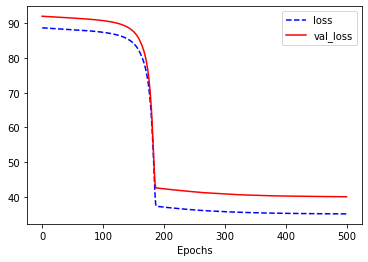

In [14]:
import matplotlib.pyplot as plt

mae = history.history['mae']
loss = history.history['loss']
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']
epochs = range(len(mae))

# Plot loss & validation loss
plt.figure()
plt.plot(epochs, loss, '--b')
plt.plot(epochs, val_loss, '-r')
plt.xlabel("Epochs")
plt.legend(["loss", "val_loss"])
plt.show()

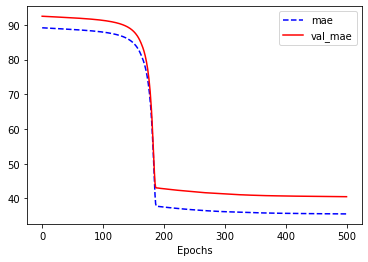

In [15]:
# Plot mae & validation mae
plt.figure()
plt.plot(epochs, mae, '--b')
plt.plot(epochs, val_mae, '-r')
plt.xlabel("Epochs")
plt.legend(["mae", "val_mae"])
plt.show()

# Testing

In [27]:
prediction = model.predict(test_features[0:1])

In [28]:
prediction

array([[88.97927]], dtype=float32)

In [29]:
mse = tf.keras.metrics.mean_squared_error(test_label[0:1], prediction).numpy()
mae = tf.keras.metrics.mean_absolute_error(test_label[0:1], prediction).numpy()


print('MSE = ', mse)
print('MAE = ', mae)

MSE =  [7917.3105]
MAE =  [88.97927]


In [19]:
prediction = model.predict(train_features)

In [20]:
index = range(len(prediction))

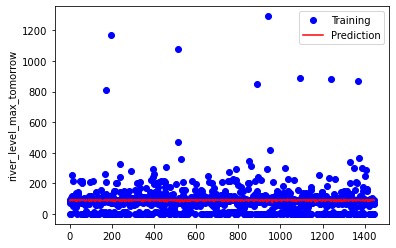

In [21]:
plt.figure()
plt.plot(index, train_label, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Training", "Prediction"])
plt.ylabel("river_level_max_tomorrow")
plt.show()

In [22]:
prediction = model.predict(test_features)
index = range(len(prediction))

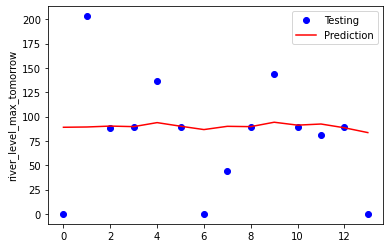

In [23]:
plt.figure()
plt.plot(index, test_label, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Testing", "Prediction"])
plt.ylabel("river_level_max_tomorrow")
plt.show()

# Generate a saved model

In [24]:
export_dir = 'save_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: save_model/assets


In [25]:
#model.save("simple_model.h5")

# Convert the saved model to TFLite

In [26]:
#converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
#tflite_model = converter.convert()